<IPython.core.display.Javascript object>


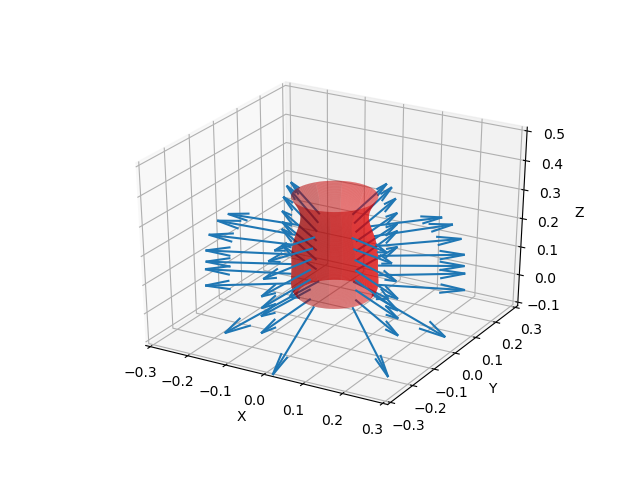

Text(0.5, 0, 'Z')

In [47]:
# Importamos os módulos necesarios
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import mpl_toolkits.mplot3d.axes3d as axes3d
%matplotlib notebook

# Cargamos as coordenadas da practica anterior
mCoords = [(0.08614901542, 0.34137302707), (0.086144737762, 0.322617202797), (0.081599283217, 0.305344475524), 
 (0.076144737762, 0.286253566434), (0.073417465035, 0.266253566434), (0.07796291958, 0.248071748252), 
 (0.083417465035, 0.228071748252), (0.086144737762, 0.207162657343), (0.092508374126, 0.183526293706), 
 (0.096144737762, 0.154435384615), (0.097053828671, 0.123526293706), (0.09796291958, 0.101708111888), 
 (0.098872010494, 0.074435384615), (0.09796291958, 0.04988993007), (0.09887201049, 0.032617202797)]

x_mCoords = []
y_mCoords = []

for i in range(len(mCoords)):
    x_mCoords.append(mCoords[i][1])
    y_mCoords.append(mCoords[i][0])

# Creamos unha figura e un eixo
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Xeramos un vector de 800 números entre ó 0 e ó 0,35
u = np.linspace(0, max(x_mCoords), 1000)

# Creamos unha función que aplique o polinomio obtido na tarefa anterior
def f(x):
    return -2772*x**6 + 2991*x**5 - 1201*x**4 + 225.9*x**3 - 21.04*x**2 + 0.9018*x + 0.08486

# Xeramos un vector de 60 números entre ó 0 e ó 2 pi. E convertímolos nunha matriz
v = np.linspace(0, 2*np.pi, 60)
U, V = np.meshgrid(u, v)


# Facemos xirar a función arredor do eixo X, collendo os valores da matriz creada anteriormente e multiplicandoos pola función
X = U
Y = f(X)*np.cos(V)
Z = f(X)*np.sin(V)

# Facemos a representación cos valores obtidos anteriormente // Cambiamos os eixos na representación para poñelo de pé 
ax.plot_surface(Y, Z, X, alpha=0.6, color='red', rstride=6, cstride=6)

# Definimos os límites para a gráfica
ax.set_xlim3d(-0.3, 0.3) 
ax.set_ylim3d(-0.3, 0.3) 
ax.set_zlim3d(-0.1, 0.5)

# Definimos os nomes dos eixos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [48]:
# Creamos os simbolos para as funcions
x, y, z, l = sp.symbols('x y z l', real=True)

# Creamos a función para facer o gradiente
def gradient(expr, varlist):
    return [sp.diff(expr,var) for var in varlist]

# Convertimos o polinomio nunha función Sympy e despexamos
f = sp.Lambda((x,y,z), (-2772*z**6 + 2991*z**5 - 1201*z**4 + 225.9*z**3 - 21.04*z**2 + 0.9018*z + 0.08486)**2 - (x**2 + y**2))

# Ecuación de la cirfunferencia:
# r**2 = x**2 + y**2, donde r es el polinomio, lo que hacemos es pasar todo al lado izquierdo e igualamos a 0


# Facemos o gradiente da función creada anterior mente e o 'numpyficamos'
grad_f = gradient(f(x, y, z), (x, y, z))
grad_f = sp.lambdify((x, y, z), grad_f, 'numpy')

# Xiramos a figura cambiando os eixes X e Z
X, Y, Z = Z, Y, X 

# Creamos unha lista onde se gardarán os puntos para a representación
puntos = []
for i in range(0,800,100):  # Recorremos Z
    pz = Z[0][i]
    for j in range(0, len(X), 10):  # Para cada valor de Z, recorremos X1 e Y1
        px = X[j][i]
        py = Y[j][i]
        puntos.append((px, py, pz))   # Finalmente engadimos os puntos en forma de tupla á lista anterior
        
# Para cada punto calculamos o gradiente nel e mostramolo
for p in puntos:
    grad = grad_f(*p)
    ax.quiver(p[0], p[1], p[2], -grad[0], -grad[1], -grad[2])
    

In [4]:
# Definimos unha función para crear o cilindro de envasado

def caja_z(centro_x, centro_y, centro_z, rad, altura_z):
    z = np.linspace(centro_z, altura_z, 50)  # Creamos una nube de puntos en el rango especificado
    angulo = np.linspace(0, 2*np.pi, 50)     # Creamos una nube que equivale al recorrido de 0 a 360 grados
    ang_grid, z_grid=np.meshgrid(angulo, z)  # Creamos una matriz a partir de los datos anteriores
    x_grid, y_grid = rad*np.cos(ang_grid) + centro_x, rad*np.sin(ang_grid) + centro_y 
                    # Queremos que aplique ese desplazamiento sobre el centro, por eso se suma
        
    # Por último devolvemos el 'giro' de la matriz por su eje
    return x_grid, y_grid, z_grid


# Mostramos el cilindro de envase
Xc,Yc,Zc = caja_z(0, 0, 0, max(y_mCoords), max(x_mCoords))
ax.plot_surface(Xc, Yc, Zc, alpha=0.5, color = 'grey')

# Mostramos el anillo donde el envase es tangente al jarrón
Xc,Yc,Zc = caja_z(0, 0, 0.105, max(y_mCoords), max(y_mCoords))
ax.plot_surface(Xc, Yc, Zc, alpha=1, color = 'green')
